This goes throuhg and determines what times the Arabic Spring page includes the countries adn events

In [25]:
import numpy as np
import pandas as pd

import json, requests

import networkx as nx
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Get AS Data

In [28]:
#gets the outlink specific time:revid
with open('02c_en_as_rev_time_m.pkl', 'rb') as pickleFile:
    time_revids = pickle.load(pickleFile)

#gets the outlink specific revid:outlinks 
with open('02c_en_as_rev_outlinks_m.pkl', 'rb') as pickleFile:
     revid_outlinks = pickle.load(pickleFile)

In [29]:
revid_outlinks

{410393753: ['Algeria',
  'Middle East',
  'Tunisia',
  'Protest',
  'Yemen',
  'Political demonstration',
  'Jordan',
  'Egypt',
  'Tunisian Revolution',
  '2010–2012 Algerian protests',
  '2011 Egyptian revolution'],
 411278546: ['Algeria',
  'Algiers',
  'Libya',
  'Left-wing politics',
  'Morocco',
  'Muslim Brotherhood',
  'North Africa',
  'Oman',
  'Revolution',
  'Sudan',
  'Tunisia',
  'Hosni Mubarak',
  'Domino theory',
  'Arab world',
  'Ali Abdullah Saleh',
  'Protest',
  'Saudi Arabia',
  'Yemen',
  'Zine El Abidine Ben Ali',
  'West Asia',
  'Rally for Culture and Democracy',
  'Self-immolation',
  'Friday prayer',
  'Béjaïa',
  'Arab states of the Persian Gulf',
  'Human rights in Yemen',
  'Political demonstration',
  'Syria',
  'Jordan',
  'Egypt',
  'War on terror',
  'Bordj Menaïel',
  'Sanaa',
  'Mohamed Ould Abdel Aziz',
  'Mauritania',
  'Constitution of Yemen',
  'Samir Rifai',
  'Boukhadra',
  'Tunisian Revolution',
  '2010–2012 Algerian protests',
  'Mohamed Bo

## English Countries

In [30]:
countrylyst = ['Tunisia', 'Egypt', 'Libya', 'Yemen', 'Syria', 'Bahrain', 'Algeria',  'Iraq', 'Jordan', 'Morocco', 'Oman']

In [38]:
#get all of the timestamps in which the arab spring includes the evnets in countrylyst

countryTimes = {}
firstTimes = {}

for place in countrylyst:
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    
    firstTimes[place] = inclusionTimes[0]
    countryTimes[place] = inclusionTimes

In [18]:
countryTimes['Tunisia'][0:5]

[Timestamp('2011-01-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-06-30 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-07-31 00:00:00+0000', tz='UTC', freq='M')]

### Break up the start and end times

In [44]:
eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in countryTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes[place]
    startTimes.append(start)
    
    first = countryTimes[place][0]
    final = countryTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in countryTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['event'] = place
#     print(countryDict)
    
    countryDF_final = pd.concat([countryDF_final,countryDict])
    

In [47]:
countryDF_final.head()

,event,start,end
0,Oman,2011-02-28 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,Oman,2013-08-31 00:00:00+00:00,2014-04-30 00:00:00+00:00
2,Oman,2016-10-31 00:00:00+00:00,2018-02-28 00:00:00+00:00
3,Oman,2018-04-30 00:00:00+00:00,2023-10-31 00:00:00+00:00
0,Tunisia,2011-01-31 00:00:00+00:00,2011-02-28 00:00:00+00:00


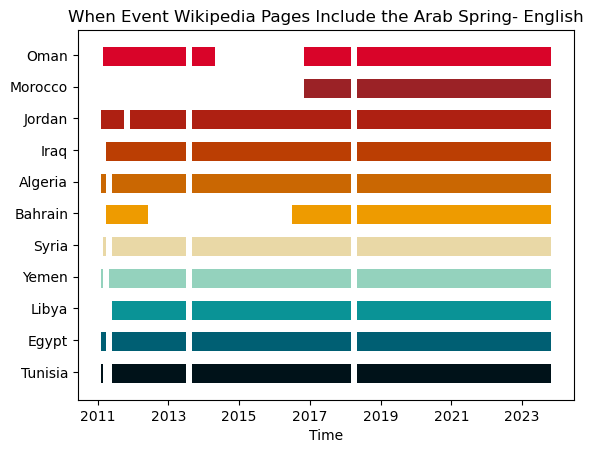

In [61]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]

j = 0
ystart = 0.65
width = 0.6
for country in countrylyst:
    xrangeLyst = []
    
    #get the sub df
    df = countryDF_final.loc[countryDF_final['event'] == str(country)].reset_index()
#     print(df)

    for i in range(len(df)):
#         print(df['start'])
#         print(i)
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
                   


ax.set_title('When Event Wikipedia Pages Include the Arab Spring')
ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11], labels=countrylyst)
ax.set_title('When Event Wikipedia Pages Include the Arab Spring- English')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])

# plt.savefig("02L_eventInclusionofAS.pdf")
# 
plt.show()

In [54]:
len(df)

8

# English Events

In [27]:
eventsLyst = ['Tunisian Revolution', '2011 Egyptian revolution', 'Libyan civil war (2011)',  'Yemeni Revolution', 'Syrian revolution', '2011 Bahraini uprising', '2010–2012 Algerian protests', '2011 Iraqi protests', '2011–2012 Jordanian protests', '2011–2012 Moroccan protests', '2011 Omani protests' ]

In [62]:
#get all of the timestamps in which the arab spring includes the evnets in events

eventTimes = {}
firstTimes_event = {}

for place in eventsLyst:
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    
    firstTimes_event[place] = inclusionTimes[0]
    eventTimes[place] = inclusionTimes

In [63]:
eventTimes['Tunisian Revolution'][0:5]

[Timestamp('2011-01-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-03-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-04-30 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M')]

In [66]:
#break up start and end times

eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in eventTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes_event[place]
    startTimes.append(start)
    
    first = eventTimes[place][0]
    final = eventTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in eventTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    eventDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    eventDict['start'] = startTimes
    eventDict['end'] = endTimes
    eventDict['event'] = place
#     print(countryDict)
    
    eventDF_final = pd.concat([eventDF_final,eventDict])
    

In [67]:
eventDF_final.head()

,event,start,end
0,Tunisian Revolution,2011-01-31 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,Tunisian Revolution,2013-08-31 00:00:00+00:00,2018-02-28 00:00:00+00:00
2,Tunisian Revolution,2018-04-30 00:00:00+00:00,2023-10-31 00:00:00+00:00
0,2011 Egyptian revolution,2011-01-31 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,2011 Egyptian revolution,2013-08-31 00:00:00+00:00,2018-02-28 00:00:00+00:00


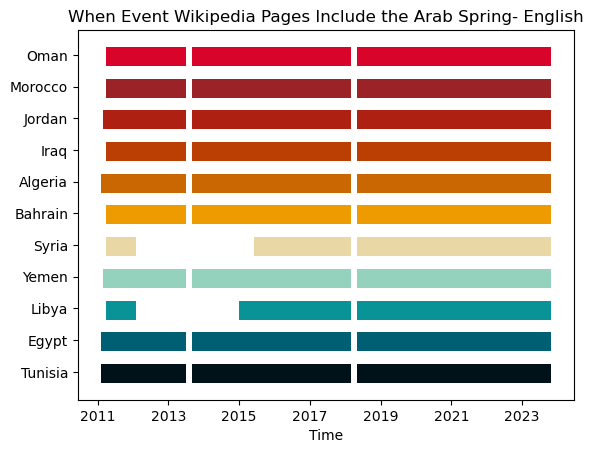

In [69]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]

j = 0
ystart = 0.65
width = 0.6
for country in eventsLyst:
    xrangeLyst = []
    
    #get the sub df
    df = eventDF_final.loc[eventDF_final['event'] == str(country)].reset_index()
#     print(df)

    for i in range(len(df)):
#         print(df['start'])
#         print(i)
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
                   


ax.set_title('When Event Wikipedia Pages Include the Arab Spring')
ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11], labels=countrylyst)
ax.set_title('When Event Wikipedia Pages Include the Arab Spring- English')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])

# plt.savefig("02L_eventInclusionofAS.pdf")
# 
plt.show()

# Arabic AS countries and events

## get arabic AS data

In [71]:
#gets the outlink specific time:revid
with open('02c_ar_as_rev_time_m.pkl', 'rb') as pickleFile:
    ar_time_revids = pickle.load(pickleFile)

#gets the outlink specific revid:outlinks 
with open('02c_ar_as_rev_outlinks_m.pkl', 'rb') as pickleFile:
     ar_revid_outlinks = pickle.load(pickleFile)

In [72]:
ar_time_revids

timestamp
2011-02-28 00:00:00+00:00     6345923.0
2011-03-31 00:00:00+00:00     6459075.0
2011-04-30 00:00:00+00:00     6602258.0
2011-05-31 00:00:00+00:00     6758727.0
2011-06-30 00:00:00+00:00     6911767.0
                                ...    
2023-06-30 00:00:00+00:00    62699194.0
2023-07-31 00:00:00+00:00    63391950.0
2023-08-31 00:00:00+00:00    63619143.0
2023-09-30 00:00:00+00:00    64206689.0
2023-10-31 00:00:00+00:00    64997097.0
Name: revid, Length: 144, dtype: float64

## arabic countries

In [70]:
countrylyst_total = ['تونس', 'مصر', 'اليمن', 'سوريا', 'البحرين', 'الجزائر',   'الأردن', 'المغرب', 'ليبيا', 'العراق', 'سلطنة عُمان' ]

In [77]:
#get all of the timestamps in which the arab spring includes the evnets in countrylyst

countryTimes = {}
firstTimes = {}

for place in countrylyst:
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in ar_revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = ar_time_revids[ar_time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    if len(inclusionTimes) > 0:
        ar_firstTimes[place] = inclusionTimes[0]
        ar_countryTimes[place] = inclusionTimes
    else:
        #these are countries that are not included at all in the page
        pass

### Break up the start and end times

In [74]:
eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in countryTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes[place]
    startTimes.append(start)
    
    first = countryTimes[place][0]
    final = countryTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in countryTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['event'] = place
#     print(countryDict)
    
    countryDF_final = pd.concat([countryDF_final,countryDict])
    